# In this Notebook we want to predict the price of an airbnb room as an exercise for your first data scientist steps.

1. How can we predict the price of an airbnb room
2. Compare two methods
3. how do we visualize the locations of the most popular rooms?


First read libraries and data

In [209]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
dflistings = pd.read_csv('listings.csv')
#dfreviews = pd.read_csv('reviews.csv')
#dfcalendar = pd.read_csv('calendar.csv')



In [234]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import seaborn as sns
from sklearn import neighbors
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
%matplotlib inline


In [211]:
#Rename column, in case of joining two dataframes
dflistings = dflistings.rename(columns={"id": "listing_id"})

#test = pd.merge(dflistings, dfcalendar, on="listing_id")

We looking at some descriptive statistic.

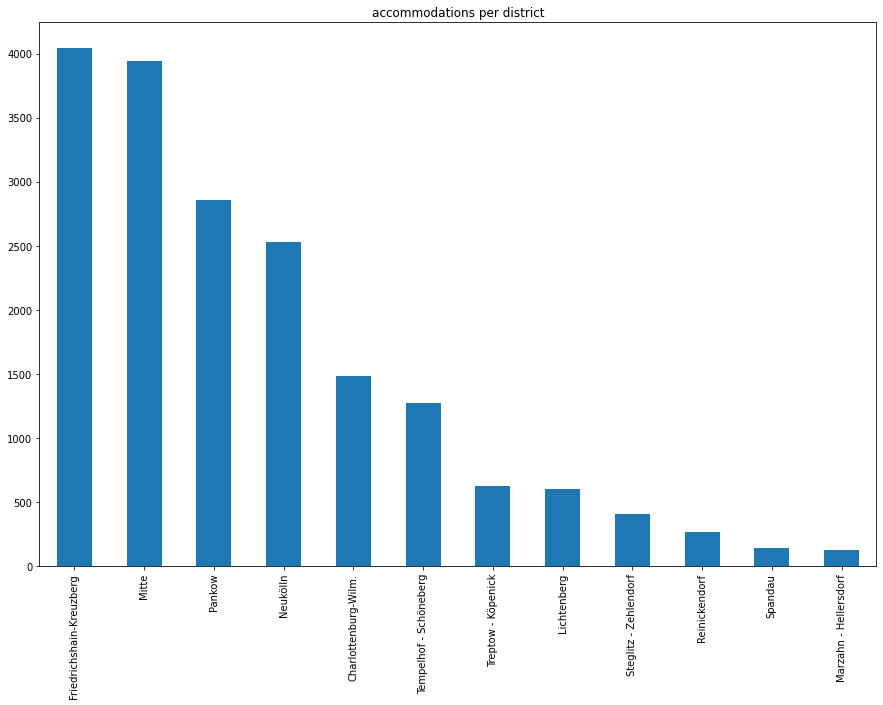

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


,price,accommodates,bathrooms,bedrooms,beds,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,reviews_per_month
count,18288.000000,18288.000000,18194.000000,16679.000000,18061.000000,18288.000000,18288.000000,18287.000000,18287.000000,1.828700e+04,1.828700e+04,18287.000000,1.828700e+04,0.0,18288.000000,18288.000000,18288.000000,18288.000000,18288.000000,18288.000000,18288.000000,14716.000000,14391.000000,14393.000000,14379.000000,14390.000000,14380.000000,14378.000000,18288.000000,14716.000000
mean,75.189633,2.714129,0.940860,1.271779,1.624439,9.324256,588.303696,9.220867,9.878657,4.704186e+05,5.878616e+05,9.597167,5.875923e+05,NaN,3.806759,10.194116,18.317531,85.560860,22.789042,2.679899,0.451990,4.626418,4.791855,4.637258,4.826007,4.828607,4.759599,4.668290,3.025153,0.815542
std,122.670894,1.619647,0.407824,0.627211,1.244291,34.238860,528.296767,34.153137,35.352463,3.175798e+07,3.550553e+07,34.517166,3.548948e+07,NaN,7.721591,17.755093,29.274837,124.507031,51.019422,9.356743,1.654162,0.804340,0.411205,0.525891,0.390002,0.397887,0.383850,0.450163,7.454440,1.577983
min,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000e+00,1.000000e+00,1.000000,1.000000e+00,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.010000
25%,35.000000,2.000000,0.500000,1.000000,1.000000,2.000000,28.000000,2.000000,2.000000,3.000000e+01,3.000000e+01,2.000000,3.000000e+01,NaN,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,4.610000,4.750000,4.500000,4.800000,4.810000,4.670000,4.550000,1.000000,0.090000
50%,55.000000,2.000000,1.000000,1.000000,1.000000,3.000000,365.000000,3.000000,3.000000,1.125000e+03,1.125000e+03,3.000000,1.125000e+03,NaN,0.000000,0.000000,0.000000,0.000000,4.000000,0.000000,0.000000,4.850000,4.920000,4.800000,4.960000,4.970000,4.880000,4.760000,1.000000,0.300000
75%,85.000000,3.000000,1.000000,1.000000,2.000000,5.000000,1125.000000,5.000000,5.000000,1.125000e+03,1.125000e+03,5.000000,1.125000e+03,NaN,3.000000,15.000000,35.000000,162.000000,17.000000,2.000000,0.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,2.000000,1.000000
max,8000.000000,16.000000,8.000000,12.000000,17.000000,1124.000000,5000.000000,1124.000000,1124.000000,2.147484e+09,2.147484e+09,1124.000000,2.147484e+09,NaN,30.000000,60.000000,90.000000,365.000000,655.000000,447.000000,104.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,76.000000,90.860000


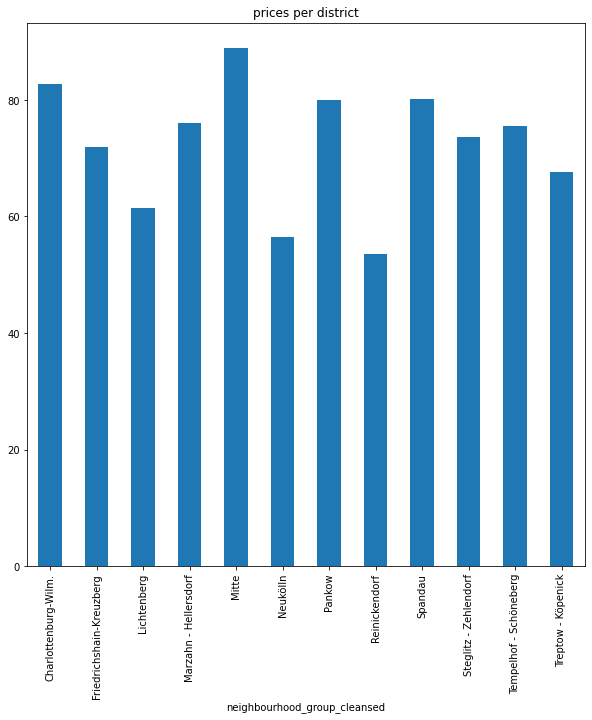

In [244]:

#Some descriptive Statistic
#fig, axs = plt.subplots(2, 2, figsize=(15, 15))
dflistings.neighbourhood_group_cleansed.value_counts().plot(kind='bar',figsize=(15,10), title='accommodations per district')
plt.show()

#Create a dataframe for showing the summary
summarylisting = dflistings[['price', 'accommodates', 'bathrooms', 'bathrooms_text',	'bedrooms',	'beds',	'minimum_nights',	'maximum_nights',	'minimum_minimum_nights',	'maximum_minimum_nights',	'minimum_maximum_nights',	'maximum_maximum_nights',	'minimum_nights_avg_ntm',	'maximum_nights_avg_ntm',	'calendar_updated',	'availability_30',	'availability_60',	'availability_90',	'availability_365',	'number_of_reviews',	'number_of_reviews_ltm',	'number_of_reviews_l30d',	'review_scores_rating',	'review_scores_accuracy',	'review_scores_cleanliness',	'review_scores_checkin',	'review_scores_communication',	'review_scores_location',	'review_scores_value',	'calculated_host_listings_count', 'reviews_per_month']].copy()
summarylisting['price']=summarylisting['price'].replace('[\$,]', '', regex=True).astype(float)
summarylisting['bathrooms']=summarylisting['bathrooms_text'].str.extract('(\d+.\d?)').astype(float)
for i in range(summarylisting.shape[0]):
  if 'shared' in str(summarylisting['bathrooms_text'][i]):
    summarylisting['bathrooms'][i]=0.5




#casting Dollar prices from object to float
dflistings['price']=dflistings['price'].replace('[\$,]', '', regex=True).astype(float)

dflistings['price'].groupby(dflistings['neighbourhood_group_cleansed']).mean().plot(kind='bar', figsize=(10,10), title='prices per district')

summarylisting.describe()

In [243]:
#detailed summary prices grouped by district
dflistings['price'].groupby(dflistings['neighbourhood_group_cleansed']).describe()

,count,mean,std,min,25%,50%,75%,max
neighbourhood_group_cleansed,,,,,,,,
Charlottenburg-Wilm.,1482.0,82.689609,103.225101,0.0,39.0,59.0,95.00,2025.0
Friedrichshain-Kreuzberg,4041.0,71.973521,142.392996,8.0,37.0,55.0,82.00,8000.0
Lichtenberg,605.0,61.494215,75.772372,9.0,30.0,45.0,68.00,1000.0
Marzahn - Hellersdorf,126.0,76.000000,76.744355,12.0,30.0,55.0,90.75,578.0
Mitte,3941.0,88.832784,110.155906,0.0,38.0,61.0,100.00,3455.0
Neukölln,2530.0,56.396443,89.049103,9.0,30.0,45.0,65.00,4000.0
Pankow,2860.0,80.025874,161.438074,9.0,40.0,60.0,90.00,8000.0
Reinickendorf,263.0,53.551331,60.059546,10.0,29.0,41.0,61.50,880.0
Spandau,137.0,80.131387,63.358204,18.0,39.0,59.0,85.00,310.0


In [245]:
#checking high prices
dflistings.sort_values(['price'], ascending=False).head(50)

,listing_id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
15985,45274790,https://www.airbnb.com/rooms/45274790,20210921151214,2021-09-22,Cozy room in Berlin,Cozy room in one of the popular areas of Berli...,NaN,https://a0.muscache.com/pictures/9e38d771-b10d...,361836933,https://www.airbnb.com/users/show/361836933,Denna,2020-08-11,"Berlin, Berlin, Germany",NaN,within a few hours,100%,100%,f,https://a0.muscache.com/im/pictures/user/3b189...,https://a0.muscache.com/im/pictures/user/3b189...,NaN,3.0,3.0,"['phone', 'jumio', 'offline_government_id', 's...",t,t,NaN,Tempelhofer Vorstadt,Friedrichshain-Kreuzberg,52.48868,13.39500,Private room in rental unit,Private room,2,NaN,1 shared bath,1.0,1.0,"[""Oven"", ""Wine glasses"", ""Pour-over coffee"", ""...",8000.0,2,10,2.0,2.0,10.0,10.0,2.0,10.0,NaN,t,0,0,23,23,2021-09-22,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,2,0,2,0,NaN
14952,42555922,https://www.airbnb.com/rooms/42555922,20210921151214,2021-09-22,Modern private room in large Altbau apartment,- Located in close proximity to the Schoenhaus...,NaN,https://a0.muscache.com/pictures/162d8f89-f33f...,232488947,https://www.airbnb.com/users/show/232488947,Chris,2018-12-26,"Berlin, Berlin, Germany","German/Spanish, young professional, easy going",NaN,NaN,NaN,f,https://a0.muscache.com/im/pictures/user/84a38...,https://a0.muscache.com/im/pictures/user/84a38...,NaN,0.0,0.0,"['email', 'phone', 'jumio', 'offline_governmen...",t,t,NaN,Prenzlauer Berg Nordwest,Pankow,52.55126,13.41251,Private room in rental unit,Private room,1,NaN,1.5 shared baths,NaN,2.0,"[""Iron"", ""Long term stays allowed"", ""Oven"", ""S...",8000.0,3,1125,3.0,3.0,1125.0,1125.0,3.0,1125.0,NaN,t,29,59,89,364,2021-09-22,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,t,1,0,1,0,NaN
16069,45478806,https://www.airbnb.com/rooms/45478806,20210921151214,2021-09-22,Magical room & experience (above us only sky...),Discover what made a stay here so unforgettabl...,"If you ask anyone familiar with Berlin, you wi...",https://a0.muscache.com/pictures/657c98b0-4e6a...,11674720,https://www.airbnb.com/users/show/11674720,Johannes,2014-01-27,"Berlin, Berlin, Germany",I'm part of a beautiful family (I think) with ...,within a few hours,100%,NaN,f,https://a0.muscache.com/im/pictures/user/1eea1...,https://a0.muscache.com/im/pictures/user/1eea1...,NaN,0.0,0.0,"['email', 'phone', 'reviews', 'jumio', 'offlin...",t,t,"Berlin, Germany",Reuterstraße,Neukölln,52.48653,13.43921,Private room in rental unit,Private room,2,NaN,1 private bath,1.0,1.0,"[""Iron"", ""Long term stays allowed"", ""Smoke ala...",4000.0,2,1125,2.0,2.0,1125.0,1125.0,2.0,1125.0,NaN,t,30,60,90,90,2021-09-22,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,08/Z/AZ/007456-19,t,2,0,2,0,NaN
7328,1996

Boxplots to check the price outliers and clean data from the outliers.



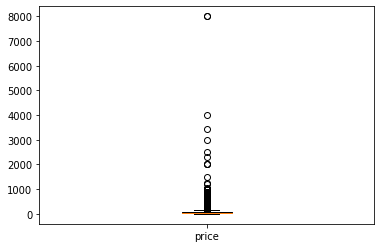

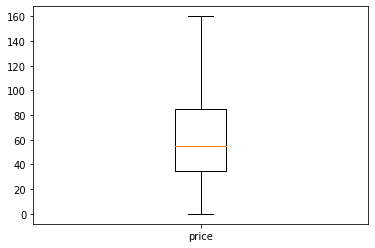

How many outliers do we have? Answer: 1199


In [246]:
#Plotting boxplots with and without outliers
plt.boxplot(summarylisting['price'], labels=['price'])
plt.show()
plt.boxplot(summarylisting['price'], showfliers=False, labels=['price'])
plt.show()

#quantiles
Q1 = summarylisting['price'].quantile(0.25)
Q3 = summarylisting['price'].quantile(0.75)

#Interquartilrange
IQR = Q3 - Q1

upper_limit = (Q3 + 1.5 *IQR)

#Number of Outliers
print('How many outliers do we have? Answer: '+str(((summarylisting['price'] < (Q1 - 1.5 * IQR)) | (summarylisting['price'] > (Q3 + 1.5 * IQR))).sum()))

#New dataset outlier trimmed
new_dflistings = dflistings[dflistings['price'] < upper_limit].copy()
new_dflistings = new_dflistings[new_dflistings['price']>0]

#fresh index
new_dflistings.index = range(new_dflistings.shape[0])

In [215]:
#new summary
new_dflistings.describe()

,listing_id,scrape_id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,beds,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
count,1.703500e+04,1.703500e+04,1.703500e+04,17019.00000,17019.00000,17035.000000,17035.000000,17035.000000,0.0,15516.000000,16831.000000,17035.000000,17035.000000,17035.000000,17035.000000,17035.000000,1.703500e+04,1.703500e+04,17035.000000,1.703500e+04,0.0,17035.000000,17035.000000,17035.000000,17035.000000,17035.000000,17035.000000,17035.000000,13762.000000,13444.000000,13446.000000,13432.000000,13443.000000,13433.000000,13431.000000,17035.000000,17035.000000,17035.000000,17035.000000,13762.000000
mean,2.531346e+07,2.021092e+13,9.138492e+07,4.34485,4.34485,52.509648,13.406025,2.529615,NaN,1.202049,1.508526,59.431112,9.602466,583.909128,9.487056,10.113883,3.788745e+05,5.049466e+05,9.857476,5.046588e+05,NaN,3.303023,9.031582,16.431876,78.525330,22.180628,2.574993,0.444731,4.619494,4.791764,4.629018,4.825395,4.828215,4.758328,4.672982,2.719871,1.627708,0.912533,0.147813,0.789783
std,1.540473e+07,2.199283e+00,1.067067e+08,40.39431,40.39431,0.032739,0.063306,1.284882,NaN,0.499279,1.028949,32.019048,35.138467,529.170062,35.049654,36.294722,2.849665e+07,3.290413e+07,35.424472,3.288553e+07,NaN,7.196302,16.789295,27.940080,120.391485,50.524112,8.779984,1.662047,0.818838,0.415497,0.533142,0.394138,0.403641,0.387374,0.453188,6.895210,4.546364,3.244269,2.087099,1.555816
min,2.015000e+03,2.021092e+13,1.581000e+03,0.00000,0.00000,52.340070,13.108990,1.000000,NaN,1.000000,0.000000,8.000000,1.000000,1.000000,1.000000,1.000000,1.000000e+00,1.000000e+00,1.000000,1.000000e+00,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.010000
25%,1.188641e+07,2.021092e+13,1.222319e+07,1.00000,1.00000,52.489015,13.368450,2.000000,NaN,1.000000,1.000000,35.000000,2.000000,25.000000,2.000000,2.000000,3.000000e+01,3.000000e+01,2.000000,3.000000e+01,NaN,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,4.600000,4.750000,4.500000,4.800000,4.810000,4.670000,4.560000,1.000000,0.000000,0.000000,0.000000,0.080000
50%,2.334611e+07,2.021092e+13,4.264249e+07,1.00000,1.00000,52.509250,13.416120,2.000000,NaN,1.000000,1.000000,50.000000,3.000000,365.000000,3.000000,3.000000,1.125000e+03,1.125000e+03,3.000000,1.125000e+03,NaN,0.000000,0.000000,0.000000,0.000000,4.000000,0.000000,0.000000,4.840000,4.930000,4.800000,4.960000,4.980000,4.880000,4.770000,1.000000,1.000000,0.000000,0.000000,0.290000
75%,3.943511e+07,2.021092e+13,1.397409e+08,2.00000,2.00000,52.533325,13.440080,3.000000,NaN,1.000000,2.000000,79.000000,5.000000,1125.000000,5.000000,5.000000,1.125000e+03,1.125000e+03,5.000000,1.125000e+03,NaN,2.000000,10.000000,23.000000,140.000000,17.000000,2.000000,0.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,2.000000,1.000000,1.000000,0.000000,0.950000
max,5.236996e+07,2.021092e+13,4.238179e+08,2010.00000,2010.00000,52.656110,13.757360,16.000000,NaN,10.000000,14.000000,159.000000,1124.000000,5000.000000,1124.000000,1124.000000,2.147484e+09,2.147484e+09,1124.000000,2.147484e+09,NaN,30.000000,60.000000,90.000000,365.000000,655.000000,424.000000,104.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,76.000000,44.000000,45.000

In [208]:

###Old Code not useful anymore
####
'''
indexnumbers = summarylisting[summarylisting['price']==summarylisting['price'].max()].index
dflistings.iloc[indexnumbers]
dflistings.drop(indexnumbers, inplace=True)
dflistings.index = range(dflistings.shape[0])

summarylisting = dflistings[['price', 'accommodates', 'bathrooms', 'bathrooms_text',	'bedrooms',	'beds',	'minimum_nights',	'maximum_nights',	'minimum_minimum_nights',	'maximum_minimum_nights',	'minimum_maximum_nights',	'maximum_maximum_nights',	'minimum_nights_avg_ntm',	'maximum_nights_avg_ntm',	'calendar_updated',	'availability_30',	'availability_60',	'availability_90',	'availability_365',	'number_of_reviews',	'number_of_reviews_ltm',	'number_of_reviews_l30d',	'review_scores_rating',	'review_scores_accuracy',	'review_scores_cleanliness',	'review_scores_checkin',	'review_scores_communication',	'review_scores_location',	'review_scores_value',	'calculated_host_listings_count', 'reviews_per_month']].copy()
summarylisting['price']=summarylisting['price'].replace('[\$,]', '', regex=True).astype(float)
summarylisting['bathrooms']=summarylisting['bathrooms_text'].str.extract('(\d+.\d?)').astype(float)
for i in range(summarylisting.shape[0]):
  if 'shared' in str(summarylisting['bathrooms_text'][i]):
    summarylisting['bathrooms'][i]=0.5

summarylisting.describe()
indexnumbers = summarylisting[summarylisting['price']==summarylisting['price'].max()].index
dflistings.iloc[indexnumbers]
'''

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


,listing_id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
16067,45478806,https://www.airbnb.com/rooms/45478806,20210921151214,2021-09-22,Magical room & experience (above us only sky...),Discover what made a stay here so unforgettabl...,"If you ask anyone familiar with Berlin, you wi...",https://a0.muscache.com/pictures/657c98b0-4e6a...,11674720,https://www.airbnb.com/users/show/11674720,Johannes,2014-01-27,"Berlin, Berlin, Germany",I'm part of a beautiful family (I think) with ...,within a few hours,100%,NaN,f,https://a0.muscache.com/im/pictures/user/1eea1...,https://a0.muscache.com/im/pictures/user/1eea1...,NaN,0.0,0.0,"['email', 'phone', 'reviews', 'jumio', 'offlin...",t,t,"Berlin, Germany",Reuterstraße,Neukölln,52.48653,13.43921,Private room in rental unit,Private room,2,NaN,1 private bath,1.0,1.0,"[""Iron"", ""Long term stays allowed"", ""Smoke ala...",4000.0,2,1125,2.0,2.0,1125.0,1125.0,2.0,1125.0,NaN,t,30,60,90,90,2021-09-22,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,08/Z/AZ/007456-19,t,2,0,2,0,NaN


In [ ]:
###Old code not needed anymore
df = dflistings[dflistings['last_review'].str.contains('^2021', na=False)].copy()
groups = df[['neighbourhood_group','room_type','price','minimum_nights', 'reviews_per_month','availability_365','license']].copy()
groups[groups['license'].isna()].groupby(['neighbourhood_group','room_type']).mean()

#df[df['license'].isna()]
#df[df['license'].isna()].sort_values(['minimum_nights'], ascending=False).head(20)
df['license'].isnull().sum()

In [216]:
#Preperation for the most popular rooms of Berlin
dflistings.head()
toprooms=dflistings[['latitude','longitude','name','number_of_reviews','room_type']].copy()
toprooms.head()

,latitude,longitude,name,number_of_reviews,room_type
0,52.53305,13.40394,Berlin-Mitte Value! Quiet courtyard/very central,143,Entire home/apt
1,52.53471,13.41810,Fabulous Flat in great Location,147,Entire home/apt
2,52.54301,13.41534,BrightRoom with sunny greenview!,293,Private room
3,52.53269,13.41805,Geourgeous flat - outstanding views,8,Entire home/apt
4,52.54813,13.40366,Apartment in Prenzlauer Berg,26,Entire home/apt


In [247]:
##Preparation of X, y for predicting prices


X = new_dflistings.copy()
X = X.drop(['latitude','longitude','last_scraped','listing_id','listing_url','scrape_id','name','description','picture_url','host_id','host_has_profile_pic','host_identity_verified','host_neighbourhood','host_listings_count','host_total_listings_count','host_verifications','amenities','neighborhood_overview','neighbourhood','neighbourhood_cleansed','host_url','host_name','host_since','host_location','host_about','host_response_time','host_response_rate','host_acceptance_rate','host_thumbnail_url','host_picture_url','minimum_nights','maximum_nights','minimum_minimum_nights','maximum_minimum_nights','minimum_maximum_nights','maximum_maximum_nights','minimum_nights_avg_ntm','maximum_nights_avg_ntm','calendar_updated','has_availability','availability_30','availability_60','availability_90','availability_365','calendar_last_scraped','number_of_reviews','number_of_reviews_l30d','first_review','last_review','review_scores_rating','review_scores_accuracy','review_scores_cleanliness','review_scores_communication','review_scores_location','review_scores_value','license','instant_bookable','calculated_host_listings_count','calculated_host_listings_count_entire_homes','calculated_host_listings_count_private_rooms','calculated_host_listings_count_shared_rooms','reviews_per_month','number_of_reviews_ltm','review_scores_checkin'], axis=1)

X['bathrooms']=X['bathrooms_text'].str.extract('(\d+.\d?)').astype(float)


for i in range(X.shape[0]):
  if 'shared' in str(X['bathrooms_text'][i]):
    X['bathrooms'][i]=0.5


X = X.drop(['bathrooms_text'], axis=1)
X['bedrooms'].fillna((X['beds']), inplace=True)
X['beds'].fillna((X['bedrooms']), inplace=True)

X = X.dropna()

'''
num_vars = X.select_dtypes(include=['float', 'int']).columns
num_vars
for col in num_vars:
    X[col].fillna((X[col].mean()), inplace=True)
'''

# Dummy the categorical variables
cat_vars = X.select_dtypes(include=['object']).copy().columns
cat_vars

for var in  cat_vars:
  # for each cat add dummy var, drop original column
  X = pd.concat([X.drop(var, axis=1), pd.get_dummies(X[var], prefix=var, prefix_sep='_', drop_first=True)], axis=1)


y = X['price'].copy()


X = X.drop(['price'],axis=1)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


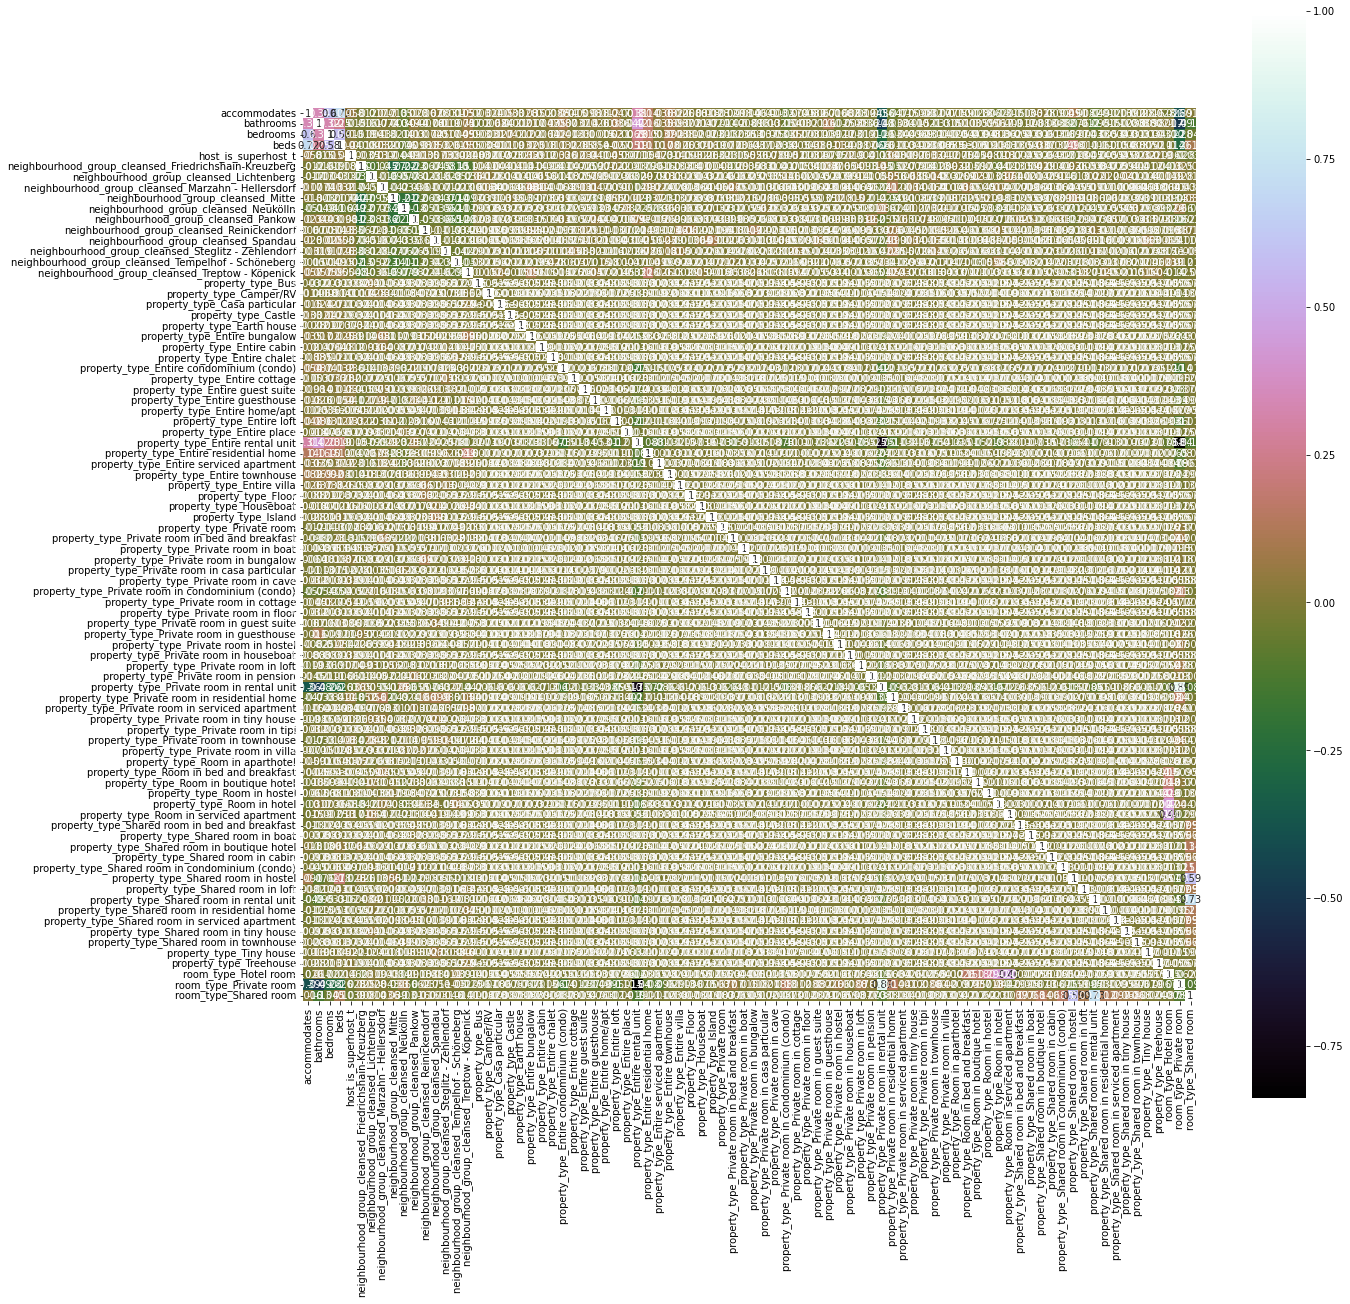

In [248]:
# GETTING Correllation matrix
corr_mat=X.corr(method='pearson')
plt.figure(figsize=(20,20))
sns.heatmap(corr_mat,vmax=1,square=True,annot=True,cmap='cubehelix')



Text(0, 0.5, 'Cumulative explained variance')

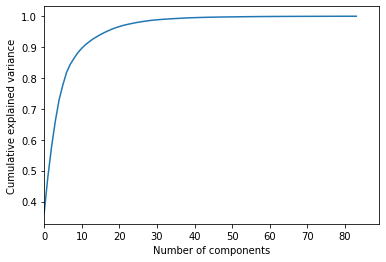

In [254]:
##PCA to reduce our variables 
X_scaler=X.values
X_scaler=np.asarray(X)

# Finding normalised array of X_Train
X_std=StandardScaler().fit_transform(X_scaler)
X_std=MinMaxScaler().fit_transform(X_scaler)

from sklearn.decomposition import PCA
pca = PCA().fit(X_std)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlim(0,89,1)
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')

In [255]:
#10 components can explain 80% of the variance
sklearn_pca=PCA(n_components=10)
X_pca=sklearn_pca.fit_transform(X_std)

###But we will not use the PCA, our results getting actually worse with it

In [297]:
X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size = .30, random_state=42)

In [222]:
y_train

13987     24.0
12372     45.0
5906      79.0
12140     81.0
15141     44.0
         ...  
11353    120.0
12033    118.0
5447      40.0
877       82.0
15899     52.0
Name: price, Length: 11848, dtype: float64

In [313]:
##K-nearest-neighbor-regression
n_neighbors=20
knn=neighbors.KNeighborsRegressor(n_neighbors,weights='uniform')
knn.fit(X_train,y_train)
y1_knn=knn.predict(X_train)
y1_knn=list(y1_knn)
y2_knn=knn.predict(X_test)
y2_knn=list(y2_knn)



rsquared_score = r2_score(y_test, y2_knn)
length_y_test = len(y_test)
print("The r-squared score for your model was {} on {} values.".format(rsquared_score, length_y_test))


The r-squared score for your model was 0.4232323989601111 on 5078 values.


In [299]:
#Ridge-Regression 
model=linear_model.Ridge()
model.fit(X_train,y_train)
y_predict=model.predict(X_test)

rsquared_score = r2_score(y_test, y_predict)
length_y_test = len(y_test)
print("The r-squared score for your model was {} on {} values.".format(rsquared_score, length_y_test))



The r-squared score for your model was 0.45837800958775055 on 5078 values.


In [302]:
#Show the ten most reviewed places and there latitude, longitude
toprooms = toprooms.sort_values('number_of_reviews', ascending=False).head(10)
toprooms

,latitude,longitude,name,number_of_reviews,room_type
10378,52.52935,13.45589,Serviced Apartment - Studio in Prenzlauer Berg,655,Hotel room
208,52.53091,13.41711,Lounge Room – Alex in 5 Min,636,Private room
308,52.53097,13.41577,Cloud room in Berlin's center - zero waste living,612,Private room
377,52.53103,13.41687,Berlin Room Oriental Style P'Berg,587,Private room
188,52.53237,13.41548,"Central, cosy and one-of-a-kind",566,Entire home/apt
58,52.52536,13.40488,Design Jewel in the midst of MITTE!,548,Entire home/apt
537,52.54013,13.35249,clean calm and cosy Mitte-Apartment near Charité,540,Entire home/apt
2747,52.53272,13.41968,Escape the Ordinary - with private bathroom,539,Private room
12082,52.51253,13.41286,"Nena Apartments Metropolpark ""Studio""",538,Entire home/apt
121,52.54223,13.35284,clean calm cosy central Berlin Wedding apartment,529,Entire home/apt


In [303]:
#Plot the location of the ten most reviewed on Berlin-Shapefile
!pip install geopandas
import geopandas as gpd
from shapely.geometry import Point, Polygon
import descartes
from google.colab import files
#uploaded = files.upload()


geometry = [Point(xy) for xy in zip(toprooms.longitude, toprooms.latitude)]
city_bound = gpd.read_file('bezirksgrenzen.shp',)

/usr/local/lib/python3.7/dist-packages/pyproj/crs/crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


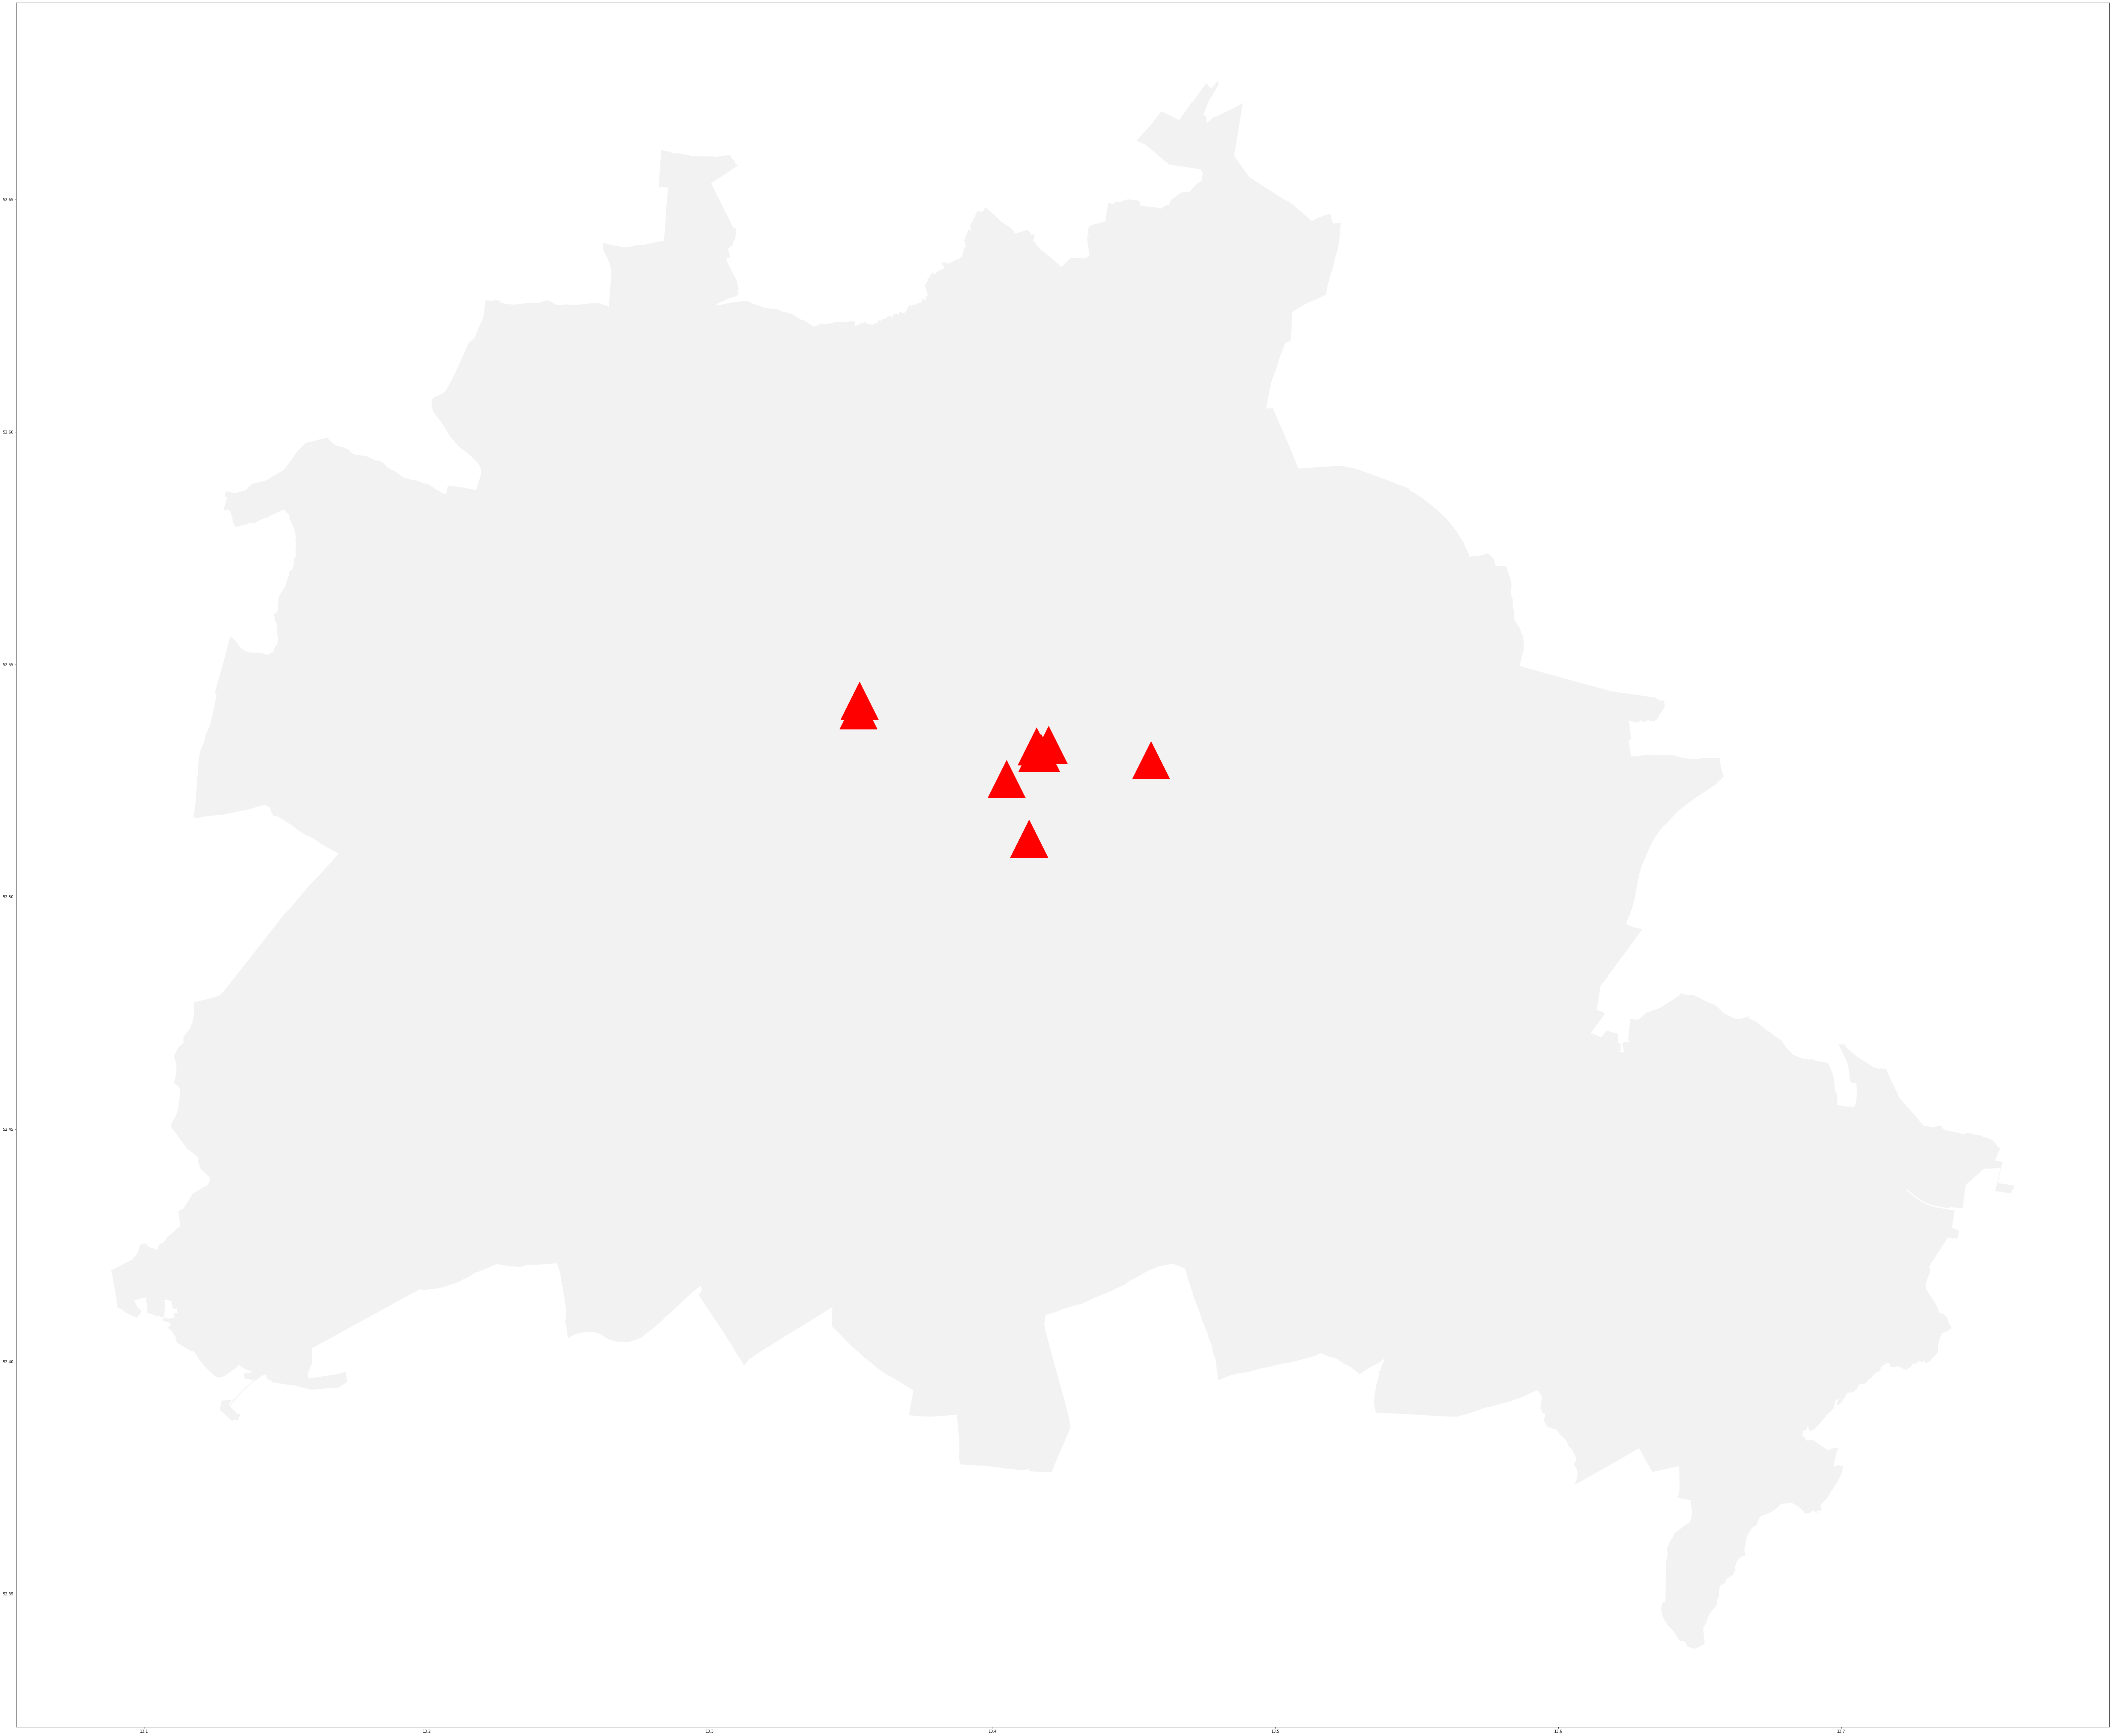

In [310]:
toprooms['location'] = geometry
fig, ax = plt.subplots(figsize = (100,100))
crs = {'init': 'epsg:4326'}
toprooms_locs = gpd.GeoDataFrame(toprooms['location'], crs=crs, geometry=toprooms['location'])
city_bound.plot(color='grey', ax=ax, alpha = 0.1)
toprooms_locs.geometry.plot(marker='^',color='red',markersize=10000,ax=ax)